In [1]:
from assaytools import platereader
from glob import glob

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from lxml import etree
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns

sns.set(style='white')
sns.set_context('talk')

In [3]:
#This function allows us to import a section from an xml formated data file and convert itto a pandas dataframe
def xml2df_section(file,section):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[%s]/*/Well"%section)
    Sections = root.xpath("/*/Section")
    print Sections[(section-1)].attrib['Name'] 
    section_name = Sections[(section-1)].attrib['Name'] 
    
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]
    
    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ### dataframe_rep replaces 'OVER' (when fluorescence signal maxes out) with '3289277', an arbitrarily high number

    dataframe_rep = dataframe.replace({'OVER':'3289277'})

    dataframe_rep[['fluorescence']] = dataframe_rep[['fluorescence']].astype('float')
            
    dataframe_pivot = pd.pivot_table(dataframe_rep, index = 'wavelength (nm)', columns = ['Well'])
    
    #Rearrange columns so they're in the right order
    cols =  dataframe_pivot['fluorescence'].columns.tolist()
    cols = [cols[0]] + cols[4:12] + cols[1:4] + [cols[12]] + cols[16:23] + cols[13:16]
    dataframe_reindex =  dataframe_pivot.reindex_axis(cols,level='Well',axis=1)
    
    return [dataframe_reindex,section_name]

In [4]:
#This function allows us to plot spectra choosing ylim and 
def plot_spectra_grid_advanced(file_set,protein,ligands,ligand,section,ylim,lines):
    grid = len(protein) + len(ligand)

    file = file_set[protein]
    
    # make a dataframe
    [df,section_name] = xml2df_section(file,section)
    
    # pick a title
    title = "%s - %s: %s" %(protein, ligand, section_name)

    # define ylim and lines
    
    ylim = ylim
    lines = lines
    
    # plot the spectra
    fig = plt.figure(figsize=(8,6));
    ax = df['fluorescence'].iloc[:,12].plot(ylim=(0,ylim),legend=False, linewidth=4,color='m',title=title);
    for line in lines:
        ax.axvline(x=line,color='0.7',linestyle='--');
    for i in range(11):
        df['fluorescence'].iloc[:,i].plot(linewidth=3,c=cm.hsv(i*15), ax = ax);
        df['fluorescence'].iloc[:,11+i].plot(legend=False, linewidth=4,c=cm.gray(i*15+50), ax = ax, fontsize =20);
    sns.despine()
    plt.xlim(250,600)
    plt.xlabel('wavelength (nm)', fontsize=20)
    plt.text(550,0.9*ylim,"lines=%s"%lines,color='0.7')
    plt.tight_layout();
    plt.savefig('SI-%s.png'%ligand)

In [5]:
file_set = {'p38': "../../data/spectra/p38/2017-01-19/p38_Axi_20170119_144258.xml"}
ligands = ['Axi']

In [6]:
ylim = 5000
lines = [325,480]

ex280_scan_top_gain100


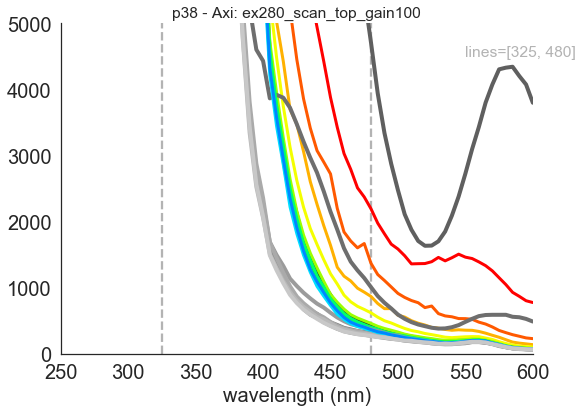

In [7]:
plot_spectra_grid_advanced(file_set,'p38',ligands,'Axi',1,ylim,lines)

In [8]:
file_set = {'p38': "../../data/spectra/p38/2016-12-20/p38_Sta_ab_20161220_112406.xml"}
ligands = ['Sta']
ylim = 90000
lines = [380,400]

ex296_scan_top_gain100


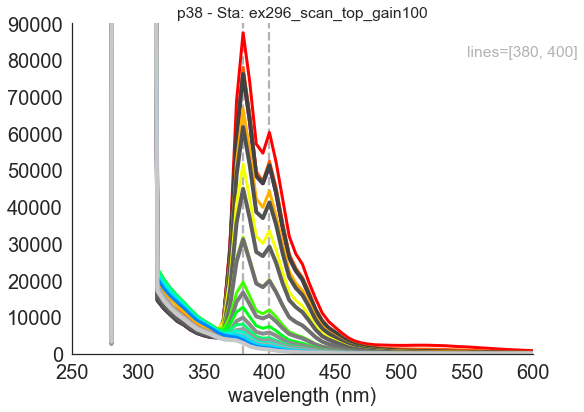

In [9]:
plot_spectra_grid_advanced(file_set,'p38',ligands,'Sta',2,ylim,lines)

In [10]:
data = platereader.read_icontrol_xml(file_set['p38'])
data.keys()

['abs_scan',
 'ex296_scan_top_gain100',
 'ex280_scan_top_gain100',
 'ex340_scan_top_gain100']

In [11]:
file_set = {'Abl': "../../data/spectra/Abl/2016-05-26/Abl_Ner_20160526_165224.xml"}
ligands = ['Ner']
ylim = 30000
lines = [480,525]

em280_Copy2


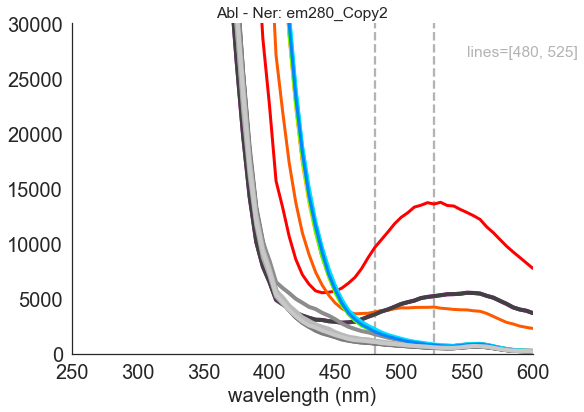

In [12]:
plot_spectra_grid_advanced(file_set,'Abl',ligands,'Ner',3,ylim,lines)